## Introduction to Machine Learning

### Instructions
- To follow along go to [github.com/jsharpna/DavisSML](https://github.com/jsharpna/DavisSML) or clone `git clone git@github.com:jsharpna/DavisSML.git`
- Navigate to `tabular_shortcourse` and click on the relevant lecture (in terminal `cd DavisSML/tabular_shortcourse`)
- For an interactive experience make the necessary installations `pip install -r requirements.txt` and open the notebooks `jupyter notebook`

*Optional*: if you are uncomfortable installing on your system python install (above), create a virtual environment: 
```
python -m venv env
source env/bin/activate
pip install -r requirements.txt
python -m ipykernel install --name=tabular --user
jupyter notebook
```
then when you open the notebook select the tabular kernel.

## Machine Learning

> A computer program learns from experience (data), with respect to a class of tasks, and performance measure (metrics/loss), if its performance improves with experience. - Paraphrased from Tom Mitchell, "Machine Learning"

### Inference vs. Prediction

- statistical inference: is this effect significant? is the model correct? etc.
- prediction: does this algorithm predict the response variable well?

### Terms

- *supervised learning*: predicting one variable from many others
- *features*, *input*, *independent variables*: X variables
- *label*, *target*, *output*, *dependent variable*: Y variable
- *tabular data*:  
  - ``X``: $n \times p$ design matrix / features
  - ``Y``: $n$ label vector

In [83]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Read wine data
wine = pd.read_csv('../data/winequality-red.csv', delimiter=';')

In [6]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
y = wine.iloc[:,-1]
X = wine.iloc[:,:-1]
n,p = X.shape

### Linear Regression

$$\hat y(x_i; \beta) = \beta_0 + \sum_{j=1}^p \beta_j x_{i,j}$$

### Inference in linear models

- statistically test for significance of effects
- requires normality assumptions, homoscedasticity, linear model is correct
- hard to obtain significance for individual effect under colinearity

### Prediction perspective

- think of ordinary least squares (OLS) as a black-box model for predicting $Y | X$
- how do we evaluate performance of prediction?
- how do we choose between multiple OLS models?

### Supervised learning

Learning machine that takes $p$-dimensional data $x_i = (x_{i,1}, \ldots, x_{i,p})$ and predicts $y_i$. 

- *Task:* **Predict** $y$ given $x$ as $f_\beta(x)$
- *Performance Metric:* **Loss** measured with some function $\ell(\beta; x,y)$
- *Experience:* **Fit** the model with training data $\{x_i,y_i\}_{i=1}^{n}$

### Linear Regression

- **Fit / Training**: Compute $\hat \beta$ from OLS with training data $\{x_i,y_i\}_{i=1}^{n}$
- **Predict / Inference**: For a new input $x_{n+1}$ predict $$\hat y_{n+1} = \hat y(x_{n+1}; \hat \beta) = \hat \beta_0 + \sum_{j=1}^p \hat \beta_j x_{n+1,j}$$
- **Loss**: Observe new response $y_{n+1}$ and see loss $$\ell(\hat \beta; x_{n+1},y_{n+1}) = (\hat y_{n+1} - y_{n+1})^2$$

In [11]:
## Answer to ex 1.1
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size = .5)
lr = LinearRegression()
lr.fit(X_tr,y_tr)

y_pred = lr.predict(X_te)
MSE = ((y_pred - y_te)**2).mean()

## It is reasonable to compare the MSE to the variance...
print(MSE)
print(y_te.var())

0.4301642625362325
0.6294978097622028


### Risk and Empirical Risk

Given a loss $\ell(\theta; X,Y)$, for parameters $\theta$, the *risk* is 
$$
R(\theta) = \mathbb E \ell(\theta; X,Y).
$$

And given training data $\{x_i,y_i\}_{i=1}^{n_0}$ (drawn iid to $X,Y$), then the *empirical risk*, or *training loss* is
$$
R_n(\theta) = \frac 1n \sum_{i=1}^n \ell(\theta; x_i, y_i).
$$
Notice that $\mathbb E R_n(\theta) = R(\theta)$ for fixed $\theta$ and iid data.

For a class of parameters $\Theta$, the *empirical risk minimizer (ERM)* is the 
$$
\hat \theta = \arg \min_{\theta \in \Theta} R_n(\theta)
$$
(may not be unique).

### Why/when is ERM a good idea?

For a fixed $\theta$, when the data is independent and identically distributed, we know by the Law of Large Numbers,
$$
R_n(\theta) = \frac 1n \sum_{i=1}^n \ell(\theta; x_i, y_i) \rightarrow_{\mathbb P} \mathbb E \ell(\theta; X,Y) = R(\theta),
$$
We want to minimize $R(\theta)$, so $R_n(\theta)$ is a pretty good surrogate.

### OLS is the ERM

OLS minimizes the following objective,
$$
R_n(\beta) = \frac 1n \sum_{i=1}^n \left(y_i - x_i^\top \beta - \beta_0 \right)^2
$$
with respect to $\beta,\beta_0$.
This is the ERM for square error loss and linear predictor.

### Example: Binary classification

Mortgage insurer pays the mortgage company if the insuree defaults on loan.  To determine how much to charge, the insurer wants to predict if they will default (1) or not (0).

An actuary (from 19th century) says that people that are young (less than 30) are irresponsible and will not insure them.  Let $x$ be the age in years, $y = 1$ if they default, and $\theta = 30$.

$$
\hat y(x;\theta) = \left\{ \begin{array}{ll}
1, &x < \theta\\
0, &x \ge \theta 
\end{array}
\right.
$$

0-1 loss is
$$
\ell_{0-1}(\theta; x,y) = 1 \textrm{ if } \hat y(x; \theta)\ne y, ~ 0 \textrm{ otherwise}.
$$
The risk is
$$
R(\theta) = \mathbb P \{ \hat y(x; \theta)\ne y \}.
$$
How well will he do?

### Issue with evaluating with training error

Let $\hat \theta$ be the ERM, then the *training error* is
$$
R_n(\hat \theta) = \min_{\theta \in \Theta} R_n(\theta)
$$
which does NOT converge to $R(\theta)$ because
$$
\mathbb E \min_\theta R_n(\theta) \ne \min_{\theta} \mathbb E R_n(\theta) = \min_\theta R(\theta).
$$

### Solution

Split the data randomly into training and test sets: 
- train $\hat \theta$ with the training data
- test $\hat \theta$ with the test data

Because the test data is independent of $\hat \theta$ we can think of the training process as fixed and test error is now unbiased for risk of $\hat \theta$.

Text(0, 0.5, 'y')

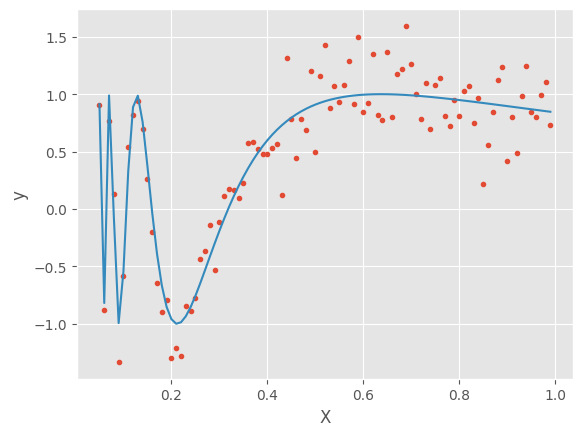

In [90]:
## Nonlinear example
x = np.arange(.05,1,.01)
y = np.sin(1/x) + np.random.normal(0,.25,len(x))
plt.plot(x,y,'.')
plt.plot(x,np.sin(1/x))
plt.xlabel("X")
plt.ylabel("y")

In [91]:
## Fit K neighbors regression
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X,y)
y_pred = knn.predict(X)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X,y)
y_pred_3 = knn.predict(X)

def plotit():
    plt.plot(x,y,'.')
    plt.plot(x,y_pred, label="10-NN")
    plt.plot(x, y_pred_3, label="3-NN")
    plt.plot(x,np.sin(1/x))
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("y")
    return {"MSE 10-NN": ((y_pred - y)**2).mean(), "MSE 3-NN": ((y_pred_3 - y)**2).mean()}

ValueError: Found input variables with inconsistent numbers of samples: [150, 95]

{'MSE 10-NN': 0.12554682378904922, 'MSE 3-NN': 0.08425736784359172}

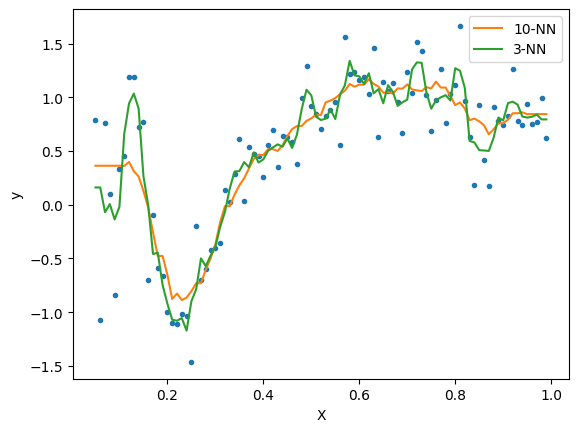

In [33]:
plotit()

In [62]:
y = wine['quality'].values
X = wine.drop(['quality'],axis=1).values
test_size = .33
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size = .33)

## Fitting OLS and KNN

stand = StandardScaler()
X_tr = stand.fit_transform(X_tr)
X_te = stand.transform(X_te)

MSEs = []
train_loss = []
neighbors_K = np.arange(1,241,2)
for k in neighbors_K:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_tr,y_tr)
    y_pred = knn.predict(X_te)
    MSEs.append(mean_squared_error(y_te,y_pred))
    train_loss.append(mean_squared_error(y_tr,knn.predict(X_tr)))

In [78]:
def plotit():
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(neighbors_K,MSEs,label='test', c='green')
    ax2.plot(neighbors_K, train_loss,label='train')
    ax1.set_xlabel(r"""k (neighbors)
    low bias $\rightarrow$ high bias
    high var $\rightarrow$ low var""")
    ax1.set_ylabel('Test error')
    ax2.set_ylabel('Training error')
    ax1.legend()
    ax2.legend()

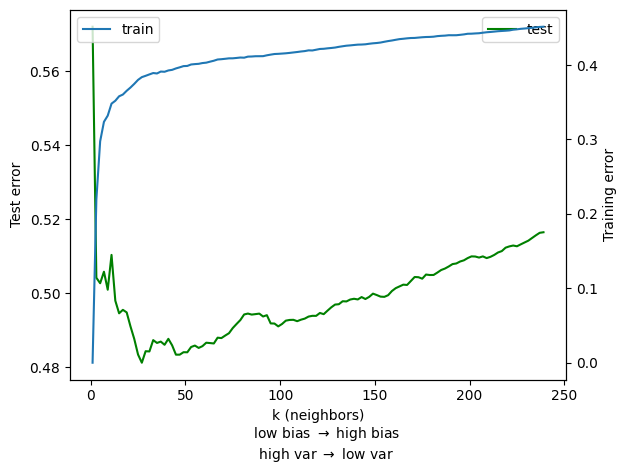

In [79]:
plotit()

In [60]:
np.min(MSEs)

0.4343174852909845

- This MSE is the minimum of MSEs (empirical risks) for $k=1,3,\ldots,241$, so it is not a good estimate of the true risk after selecting $k$
- This is why we create validation sets, to maintain a held-out test set to give an honest estimate of the true risk.

### Cross validation

Recall that we fit on training set and tested (validated) on test set.  

- We lose much of the data in training if we make test set large
- But if test set is small then the error estimate is noisy

To "stabilize" the test error we can draw a new test set and then average the resulting test errors, this is called *cross-validation*.

### Cross validation

**K-fold cross-validation**
1. Partition data into K sets of size $n/K$ randomly.
2. For each set $i = 1,\ldots,K$:
   1. Fit on all data but the set $i$
   2. Test on set $i$
   3. Obtain test error $e_i$
3. Return error estimate $\frac 1K \sum_i e_i$

**Leave-one-out CV:** Set $K = n$, each sample is its own holdout.

In [85]:
# SKLearn API

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 1: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 3: Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train_pca, y_train)

# Predict using the trained classifier
y_pred = classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.56%


In [86]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),         # Step 1: Standardize the data
    ('pca', PCA(n_components=2)),          # Step 2: Reduce dimensionality using PCA
    ('classifier', RandomForestClassifier(n_estimators=100))  # Step 3: Train a Random Forest classifier
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred = pipeline.predict(X_test)

# Evaluate the pipeline
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.56%


In [87]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Predict using the pipeline
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the pipeline
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Fold accuracy: {accuracy * 100:.2f}%')

# Calculate the average accuracy
average_accuracy = sum(accuracies) / len(accuracies)
print(f'Average accuracy: {average_accuracy * 100:.2f}%')

Fold accuracy: 90.00%
Fold accuracy: 93.33%
Fold accuracy: 93.33%
Fold accuracy: 86.67%
Fold accuracy: 86.67%
Average accuracy: 90.00%
